In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle

In [76]:
d1 = pickle.load(open("Results/res_sim_online_EM.pickle", "rb")) 

In [42]:
d2 = pd.read_csv('Results/simonline_grouse_smaes.csv',header=None)

In [43]:
d3 = pd.read_csv('Results/simonline_kfmc_smaes.csv',header=None)

In [44]:
d2.rename(columns = {0:'cont', 1:'ord', 2:'bin', 3:'residual'}, inplace=True)
d3.rename(columns = {0:'cont', 1:'ord', 2:'bin'}, inplace=True)

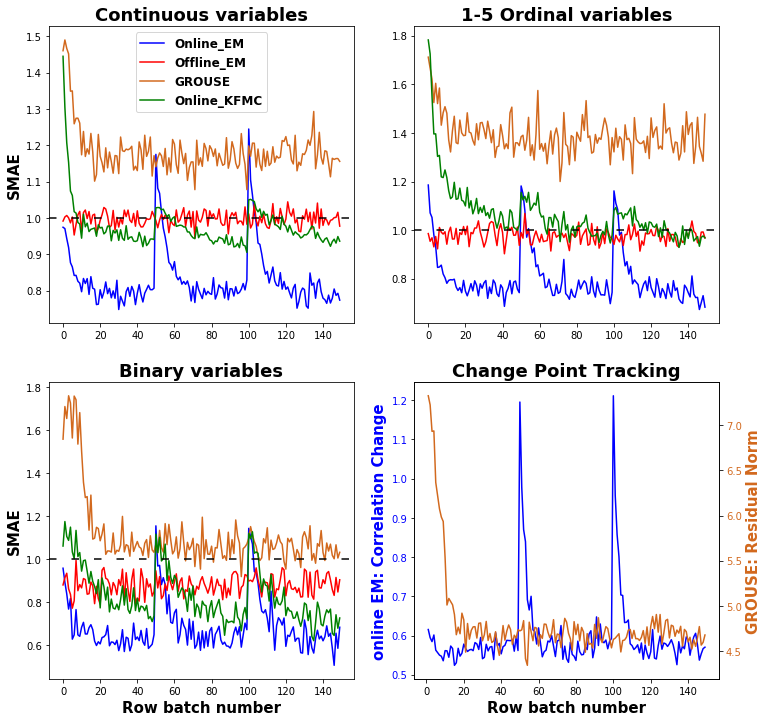

In [139]:
grouse_c = 'chocolate'
size_ylab = 15
size_xlab = 15
size_main = 18
size_legend =12
fig, ax = plt.subplots(2, 2, figsize = (12,12))
for i, name in enumerate(['cont', 'ord', 'bin']):
    ax[i//2, i%2].plot(d1['online_EM'][name], label='Online_EM', color='blue')
    ax[i//2, i%2].plot(d1['offline_EM'][name], label='Offline_EM', color='red')
    ax[i//2, i%2].plot(d2[name], label='GROUSE', color=grouse_c)
    ax[i//2, i%2].plot(d3[name], label='Online_KFMC', color='green')
lns1=ax[1,1].plot(d1['online_EM']['corr_diff'][1:], label='Online_EM', color='blue')
ax[1,1].tick_params(axis='y', labelcolor='blue')
ax[1,1].set_ylabel('online EM: Correlation Change', color='blue',
                   fontweight='bold', fontsize=size_ylab)
ax2 = ax[1,1].twinx()
ax2.set_ylabel('GROUSE: Residual Norm', color=grouse_c, 
               fontweight='bold', fontsize=size_ylab)
lns2=ax2.plot(d2['residual'][1:], label='GROUSE', color=grouse_c)
ax2.tick_params(axis='y', labelcolor=grouse_c)
ax[0,0].legend(loc = 'upper center', prop={'weight':'bold', 'size':size_legend})

lns = lns1+lns2
labs = [l.get_label() for l in lns]
#ax[1,1].legend(lns, labs, loc='center left', prop={'weight':'bold', 'size':size_legend})

ax[0,0].set_title('Continuous variables', fontweight='bold', fontsize=size_main)
ax[0,1].set_title('1-5 Ordinal variables', fontweight='bold', fontsize=size_main)
ax[1,0].set_title('Binary variables', fontweight='bold', fontsize=size_main)
ax[1,1].set_title('Change Point Tracking', fontweight='bold', fontsize=size_main)

ax[0,0].set_ylabel('SMAE',fontweight='bold', fontsize=size_ylab)
ax[1,0].set_ylabel('SMAE',fontweight='bold', fontsize=size_ylab)
ax[1,0].set_xlabel('Row batch number',fontweight='bold', fontsize=size_xlab)
ax[1,1].set_xlabel('Row batch number',fontweight='bold', fontsize=size_xlab)

ax[0,0].axhline(y=1, color = 'black', linestyle=(0, (5,10)))
ax[0,1].axhline(y=1, color = 'black', linestyle=(0, (5,10)))
ax[1,0].axhline(y=1, color = 'black', linestyle=(0, (5,10)))

fig.savefig('sim_online_py.pdf', bbox_inches='tight')

In [49]:
dd1 = pickle.load(open("Results/res_stocks_EM.pickle", "rb")) 

In [69]:
dd2 = pd.read_csv('Results/stocks_grouse_err.csv',header=None)

In [70]:
dd3 = pd.read_csv('Results/stocks_kfmc_err.csv',header=None)

In [71]:
dd2.rename(columns = 
           {0:'return_mae', 1:'return_rmse', 2:'price_mae', 3:'price_rmse', 
            4:'return_residual', 5:'residual_price'
           }, 
           inplace=True)
dd3.rename(columns = 
           {0:'return_mae', 1:'return_rmse', 2:'price_mae', 3:'price_rmse'}, 
           inplace=True)

In [58]:
print({nw:pd.DataFrame(dd1[nw]['price'])['RMSE'].mean() for nw in dd1})

{50: 4.914931043066059, 100: 4.932866098660106, 150: 4.918868268719863, 200: 4.905357230325402}


In [59]:
print({nw:pd.DataFrame(dd1[nw]['log_return'])['RMSE'].mean() for nw in dd1})

{50: 0.01782418666953179, 100: 0.01782453789384266, 150: 0.017825449223819873, 200: 0.01782656482384359}


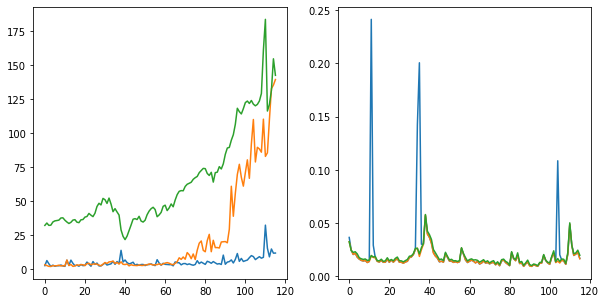

In [74]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
ax[0].plot(pd.DataFrame(dd1[50]['price'])['RMSE'], label='Online_EM')
ax[0].plot(dd2['price_rmse'], label='GROUSE')
ax[0].plot(dd3['price_rmse'], label='OnlineKFMC')
ax[1].plot(dd3['return_rmse'], label='OnlineKFMC')
ax[1].plot(dd2['return_rmse'], label='GROUSE')
ax[1].plot(pd.DataFrame(dd1[50]['log_return'])['RMSE'], label='Online_EM')